# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [6]:
import os
os.getcwd()

'/home/workspace/dog_project'

In [2]:
#!cp -r /data/lfw .
#!cp -r /data/dog_images/ .
#!cp -r /data/dog_images/ .

In [5]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


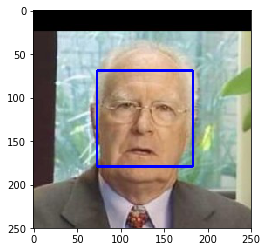

In [7]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[1000])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [8]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [6]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

humans_detected_in_humans = []

for image in human_files_short:
    humans_detected_in_humans.append(face_detector(image))
    
humans_detected_in_dogs = []

for image in dog_files_short:
    humans_detected_in_dogs.append(face_detector(image))  
    
print("There are %d percent humans detected in humans" % humans_detected_in_humans.count(True))
print("There are %d percent humans detected in dogs" % humans_detected_in_dogs.count(True))

There are 98 percent humans detected in humans
There are 17 percent humans detected in dogs


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [7]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [9]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 93091614.47it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
#ImageFile.LOAD_TRUNCATED_IMAGES = True
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    # preprocessing
    image = Image.open(img_path)
    
    ## define transformations
    apply_transformations = transforms.Compose([transforms.Resize((224,224)),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                 std=[0.229, 0.224, 0.225])])
    ## apply defined transformations
    image = apply_transformations(image)
    
    ## add an additional dimension to tensor that is expected by vgg16
    image = image.unsqueeze_(0)  
    
    ## predict using pretrained vgg16 model
    
    vgg16 = models.vgg16(pretrained=True)  
    
    prediction = vgg16(image)
    
    ## extract the index of the highest prediction
    prediction_index = prediction.detach().numpy().argmax()
    
    ## Return the *index* of the predicted class for that image
    return prediction_index # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [85]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):    
    ## TODO: Complete the function.
    prediction_index = VGG16_predict(img_path)
    if (prediction_index >= 151) and (prediction_index <= 268):
        answer = "true"
    else:
        answer= "false"
    
    return answer # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [15]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

humans_detected_in_dogs = []
for idx, image in enumerate(human_files_short):
    humans_detected_in_dogs.append(dog_detector(image))


In [16]:
dogs_detected_in_dogs = []
for idx, image in enumerate(dog_files_short):
    dogs_detected_in_dogs.append(dog_detector(image))


In [17]:
print("There are %d percent dogs detected in human images" % humans_detected_in_dogs.count("true"))
print("There are %d percent of dogs detected in dog images" % dogs_detected_in_dogs.count("true"))

There are 0 percent dogs detected in human images
There are 100 percent of dogs detected in dog images


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [10]:
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# mapping directories to train, valid and test datasets

root_dir = './dog_images/'
train_dir = os.path.join(root_dir, 'train')
valid_dir = os.path.join(root_dir, 'valid')
test_dir = os.path.join(root_dir, 'test')

img_size = (224,224)
_mean = [0.485, 0.456, 0.406]
_std = [0.229, 0.224, 0.225]

# data preparation and augmentation

data_transforms = {
    'transform_train': transforms.Compose([
        transforms.Resize(img_size),
        transforms.RandomRotation(30),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(_mean, _std)
    ]),
    'tranform_valid_test': transforms.Compose([
        transforms.Resize(img_size),
        transforms.ToTensor(),
        transforms.Normalize(_mean, _std)
    ])
}

batch_size = 64

train_data = datasets.ImageFolder(train_dir, transform = data_transforms['transform_train'])
valid_data = datasets.ImageFolder(valid_dir, transform = data_transforms['tranform_valid_test'])
test_data = datasets.ImageFolder(test_dir, transform = data_transforms['tranform_valid_test'])

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle= True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size = batch_size, shuffle= True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle= False)

loaders_scratch = {'train' : train_loader,
                   'valid' : valid_loader,
                   'test' : test_loader }


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

#### data_transforms['transform_train'] does several steps in data preparation and augmentation.

1. Resize(img_size) - resizes the input Image to the given size of 224x224 pixels
2. RandomRotation(30) - randomly rotates an input image in a range +-30 degrees
3. RandomHorizontalFlip() - horizontally flips the given Image randomly with a default probability of 0.5.
4. ToTensor() - converts an Image in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
5. Normalize() - normalizes a tensor image with mean and standard deviation. 

####  data_transforms['tranform_valid_test'] does several steps in data preparation and augmentation.
1. Resize(img_size) - resizes the input Image to the given size of 224x224 pixels
2. ToTensor() - converts it to a Tensor
3. Normalize() - normalizes a tensor image with mean and standard deviation. 

The size for the input tenzor is (3 x 224 x 224) because in pytorch models documentation it is written that all pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]. 

As seen in the transformations, I decided to augment the data by RandomRotation(30) and RandomHorizontalFilp(), so by rotations and flips.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [33]:
print("Number of dog breeds in the training set is: ", len(train_loader.dataset.classes))

Number of dog breeds in the training set is:  133


In [12]:
# list of dog breeds
class_names = [item[4:].replace("_", " ") for item in train_loader.dataset.classes]

In [10]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        # convolutional layer #1
        self.convL1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(num_features=16)
        # convolutional layer #2
        self.convL2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(num_features=32)
        # convolutional layer #3
        self.convL3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(num_features=64)
        # convolutional layer #4
        self.convL4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(num_features=128)
        # convolutional layer #5
        self.convL5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(num_features=256)
        # max pooling layer #1
        self.pool = nn.MaxPool2d(2,2)
        
        # drop out layer
        #self.dropOutL1 = nn.Dropout(p=0.5)
        
        # fully connected layers
        self.fcL1 = nn.Linear(256 * 7 * 7 , 133)
        
    def forward(self, x):
        ## Define forward behavior
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.bn1(self.convL1(x))))
        x = self.pool(F.relu(self.bn2(self.convL2(x))))
        x = self.pool(F.relu(self.bn3(self.convL3(x))))
        x = self.pool(F.relu(self.bn4(self.convL4(x))))
        x = self.pool(F.relu(self.bn5(self.convL5(x))))
        ## flaten cnn output for the fully connected layers
        x = x.view(-1, 12544)

        
        x = self.fcL1(x) # F.relu
        #x = self.dropOutL1(x)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# check if CUDA is available
use_cuda = torch.cuda.is_available()


# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [11]:
model_scratch

Net(
  (convL1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (convL2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (convL3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (convL4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (convL5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fcL1): Linear(in_features=12544, out_features=133, bias=True)
)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

In [37]:
!pip install torchsummary
from torchsummary import summary
summary(model_scratch, input_size=(3, 224, 224))

You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 224, 224]             448
       BatchNorm2d-2         [-1, 16, 224, 224]              32
         MaxPool2d-3         [-1, 16, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]           4,640
       BatchNorm2d-5         [-1, 32, 112, 112]              64
         MaxPool2d-6           [-1, 32, 56, 56]               0
            Conv2d-7           [-1, 64, 56, 56]          18,496
       BatchNorm2d-8           [-1, 64, 56, 56]             128
         MaxPool2d-9           [-1, 64, 28, 28]               0
           Conv2d-10          [-1, 128, 28, 28]          73,856
      BatchNorm2d-11          [-1, 128, 28, 28]             256
        MaxPool2d-12  

#### Input tenzor 
The size for the input tenzor is (3 x 224 x 224) because in pytorch models documentation it is written that all pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. 

#### Convolutional layers

The convolutional layer is produced by applying a series of many different image filters, also known as convolutional kernels, to an input image. Convolutional layers are making the input array of pixels deeper.
I have defined 5 convolutional layers where filters are going from 16, 32, 64, 128 and 256 as we go from one conv layer to anext one. 
For example in conv layer #1 when we stack these images produced by applying 16 filters, we form a complete convolutional layer with a depth of 16.
The more conv layers we include the more complex the patterns will become that a network can detect.

#### batch normalisation 2d layers

Afer every convolutional layer I have applied the batch normalisation. Batch normalization reduces the amount by what the hidden unit values shift around (covariance shift). It can be thought of as doing preprocessing at every layer of the network.

#### RELU layer

It is applied after every batch normalized convolutional layer. RELU layer will apply an elementwise activation function, such as the max(0,x) thresholding at zero. This leaves the size of the volume unchanged. The purpose of applying the rectifier function is to increase the non-linearity in our images. The reason we want to do that is that images are naturally non-linear.

#### MaxPool2d

MaxPool2d layer is performing a downsampling operation along the spatial dimensions (width, height) which results in volume that has divided by 2 in width and height dimension. It doesn't have any parameters that are being updated.
The sequence of operations is as following Conv2d-1 [-1, 16, 224, 224] BatchNorm2d-2  [-1, 16, 224, 224] MaxPool2d-3[-1, 16, 112, 112] as an example. We see that after the first convolutional layer and batch normalisation, maxpool layer reduced width and height from 224x224 to 112x112 pixels. Stride of the max pool layer is 2.

#### Last layer and output 

Fully-connected layer has a goal to compute the class scores, resulting in volume of size of [-1, 133], where each of the 133 numbers correspond to a class score for one of the 133 dog cathegories. Each neuron in this layer will be connected to all the numbers in the previous volume.



### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [38]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr = 0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [39]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [40]:
import timeit

In [37]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # weights to zero
            optimizer.zero_grad()
            
            # apply a model to the data
            output = model(data)
            
            # loss
            loss = criterion(output, target)
            
            # backpropagation
            loss.backward()
            
            # gradient
            optimizer.step()
            
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if batch_idx % 100 == 0:
                print('Epoch %d, Batch %d loss: %.6f' %
                  (epoch, batch_idx + 1, train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            valid_loss_min = valid_loss
            
    # return trained model
    return model

start = timeit.timeit()
# train the model
model_scratch = train(25, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

end = timeit.timeit()
print (end - start)

Epoch 1, Batch 1 loss: 4.872371
Epoch 1, Batch 101 loss: 5.431242
Epoch: 1 	Training Loss: 5.396991 	Validation Loss: 4.608558
Validation loss decreased (inf --> 4.608558).  Saving model ...
Epoch 2, Batch 1 loss: 4.264073
Epoch 2, Batch 101 loss: 4.285579
Epoch: 2 	Training Loss: 4.286024 	Validation Loss: 4.235751
Validation loss decreased (4.608558 --> 4.235751).  Saving model ...
Epoch 3, Batch 1 loss: 4.062566
Epoch 3, Batch 101 loss: 3.984491
Epoch: 3 	Training Loss: 3.981362 	Validation Loss: 4.093254
Validation loss decreased (4.235751 --> 4.093254).  Saving model ...
Epoch 4, Batch 1 loss: 3.724935
Epoch 4, Batch 101 loss: 3.725317
Epoch: 4 	Training Loss: 3.721616 	Validation Loss: 3.960099
Validation loss decreased (4.093254 --> 3.960099).  Saving model ...
Epoch 5, Batch 1 loss: 3.349883
Epoch 5, Batch 101 loss: 3.479596
Epoch: 5 	Training Loss: 3.466855 	Validation Loss: 3.844357
Validation loss decreased (3.960099 --> 3.844357).  Saving model ...
Epoch 6, Batch 1 loss: 2.

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [38]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.383864


Test Accuracy: 23% (193/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [11]:
## TODO: Specify data loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle= True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size = batch_size, shuffle= True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle= False)

loaders_transfer = {'train' : train_loader,
           'valid' : valid_loader,
           'test' : test_loader  
}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [13]:
import torch
import torchvision.models as models
import torch.nn as nn
from collections import OrderedDict

use_cuda = torch.cuda.is_available()

## TODO: Specify model architecture 

# define VGG16 model
model_transfer = models.vgg16(pretrained=True)

# Freeze parameters of the model to avoid brackpropagation
for param in model_transfer.parameters():
    param.requires_grad = False

# Hyperparameters for my network
input_size = 25088
hidden_sizes = [4096, 512]
output_size = len(train_data.classes) # number of dog classes from the train_data
drop_p = 0.50

# Define the classifier
classifier = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(input_size, hidden_sizes[0])),
    ('reLU1', nn.ReLU()),
    ('dropout1', nn.Dropout(p=drop_p)),
    ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
    ('reLU2', nn.ReLU()),
    ('dropout2', nn.Dropout(p=drop_p)),
    ('fc4', nn.Linear(hidden_sizes[1], output_size))
]))

# Relace the original classifier from vgg16 with the dog breed classifier
model_transfer.classifier = classifier

if use_cuda:
    model_transfer = model_transfer.cuda()

# Print the model
print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [43]:
!pip install torchsummary
from torchsummary import summary
summary(model_transfer, input_size=(3, 224, 224))

You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12  

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 


VGG16 has been pretrained on millions on images of which, as seen from the dictionary https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a, between 151 and 268 out of 1000, i.e. 117 of classes are representing dog breeds. That makes the pretrained network relevant in the pretrained mode.

I have used VGG16 pretrained network as a feature extractor in my CNN architecture. I kept all the convolutional layers, but replaced the final fully-connected layer with my own classifier whose task was to classify 133 dog breed classe.. This way we can use VGG16 as a fixed feature extractor for our dog images and then easily train a simple classifier on top of that.

In steps it is summerized as following:

- Load in a pre-trained VGG16 model
- "Freeze" all the parameters, so the net acts as a fixed feature extractor
- Remove the last layer
- Replace the last layer with a linear classifier of our own

Freezing simply means that the parameters in the pre-trained model will not change during training.

In the fully connected layer ther is a hidden layer inbetween one with 4096 input and 512 output features.

Relu rectifier has been applied after first two linear fc layers.

Dropput with 0.5 is used in regularizing the fully connected layers.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [14]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = torch.optim.Adam(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [17]:
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # weights to zero
            optimizer.zero_grad()
            
            # apply a model to the data
            output = model(data)
            
            # loss
            loss = criterion(output, target)
            
            # backpropagation
            loss.backward()
            
            # gradient
            optimizer.step()
            
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if batch_idx % 100 == 0:
                print('Epoch %d, Batch %d loss: %.6f' %
                  (epoch, batch_idx + 1, train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
model_transfer = train(60, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch 1, Batch 1 loss: 4.649704
Epoch 1, Batch 101 loss: 4.317626
Epoch: 1 	Training Loss: 4.292590 	Validation Loss: 2.894619
Validation loss decreased (inf --> 2.894619).  Saving model ...
Epoch 2, Batch 1 loss: 3.911922
Epoch 2, Batch 101 loss: 3.426368
Epoch: 2 	Training Loss: 3.413572 	Validation Loss: 1.944773
Validation loss decreased (2.894619 --> 1.944773).  Saving model ...
Epoch 3, Batch 1 loss: 2.854620
Epoch 3, Batch 101 loss: 2.942917
Epoch: 3 	Training Loss: 2.946669 	Validation Loss: 1.548532
Validation loss decreased (1.944773 --> 1.548532).  Saving model ...
Epoch 4, Batch 1 loss: 2.526200
Epoch 4, Batch 101 loss: 2.684276
Epoch: 4 	Training Loss: 2.684347 	Validation Loss: 1.326706
Validation loss decreased (1.548532 --> 1.326706).  Saving model ...
Epoch 5, Batch 1 loss: 2.237490
Epoch 5, Batch 101 loss: 2.497789
Epoch: 5 	Training Loss: 2.490248 	Validation Loss: 1.130027
Validation loss decreased (1.326706 --> 1.130027).  Saving model ...
Epoch 6, Batch 1 loss: 2.

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [18]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))


test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)



Test Loss: 1.023453


Test Accuracy: 73% (618/836)


In [46]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [64]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

from PIL import Image
#ImageFile.LOAD_TRUNCATED_IMAGES = True
import torchvision.transforms as transforms

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    model_transfer = model_transfer.cuda()

def predict_breed_transfer(model_transfer, class_names, img_path):
    # load the image and return the predicted breed
    ## Load and pre-process an image from the given img_path
    # preprocessing
    image = Image.open(img_path)
    
    ## define transformations
    apply_transformations = transforms.Compose([transforms.Resize((224,224)),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                 std=[0.229, 0.224, 0.225])])
    ## apply defined transformations
    image = apply_transformations(image)
    
    ## add an additional dimension to tensor that is expected by vgg16
    image = image.unsqueeze_(0)
    
    if use_cuda:
        image = image.cuda()
    
    ## predict using pretrained model_transfer 
    prediction = model_transfer(image)
    prediction = prediction.cpu()
    ## extract the index of the highest prediction
    prediction_index = prediction.detach().numpy().argmax()
    predicted_breed = class_names[prediction_index]
    ## extract the index of the highest prediction
    
    ## Return the *index* of the predicted class for that image
    return (predicted_breed, prediction_index) # predicted class index


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [ ]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
import cv2      
import matplotlib.pyplot as plt                        
%matplotlib inline


def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    if face_detector(img_path) is True:
        pred = predict_breed_transfer(model_transfer, class_names, img_path)
        print("There is a human detected on the photo!\n If you born as a dog, you might look like a {0}".format(pred)) 
    elif dog_detector(img_path) == 'true':
        pred = predict_breed_transfer(model_transfer, class_names, img_path)
        print("Dog has been detected in the photo!\n It seems to be a {0}".format(pred)) 
    else:
        print("Houston, we have a problem!")
  

In [8]:
import glob
#test_images = glob.glob("/home/workspace/dog_project/images/*")


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

In [99]:
import glob
my_photos = glob.glob("/home/workspace/dog_project/my_photos/*")

In [100]:
my_photos

['/home/workspace/dog_project/my_photos/photo-1518791841217-8f162f1e1131.jpg',
 '/home/workspace/dog_project/my_photos/A-fluffy-cat-looking-funny-surprised-or-concerned.jpg',
 '/home/workspace/dog_project/my_photos/419598_161409240645479_1696458233_n.jpg',
 '/home/workspace/dog_project/my_photos/54436858_798654233832100_5004732490162634752_n.jpg',
 '/home/workspace/dog_project/my_photos/38874888_1812697045516682_7675418286678343680_n.jpg',
 '/home/workspace/dog_project/my_photos/53733279_1251228191696278_5905879842192097280_n.jpg',
 '/home/workspace/dog_project/my_photos/54435626_301918780492958_7509344365337116672_n.jpg',
 '/home/workspace/dog_project/my_photos/54520241_2139841676135549_4762728288672022528_o.jpg',
 '/home/workspace/dog_project/my_photos/Doberman-Pinscher-On-White-03.jpg',
 '/home/workspace/dog_project/my_photos/54194697_337115360258363_5128153297445715968_n.jpg',
 '/home/workspace/dog_project/my_photos/41661048_1861310507322002_678217791790120960_n.jpg',
 '/home/works

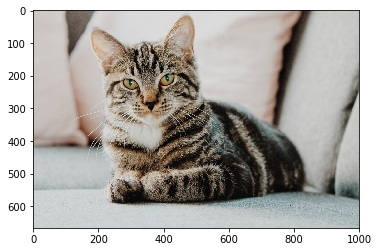

Huston, we have a problem!


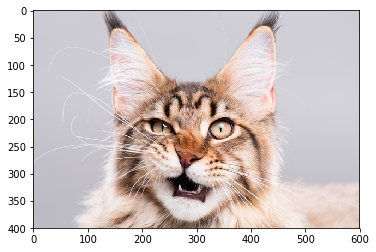

Huston, we have a problem!


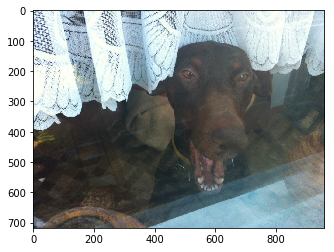

Dog has been detected in the photo!
 It seems to be a Black and tan coonhound


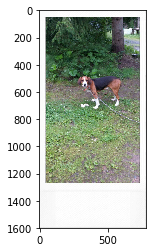

Dog has been detected in the photo!
 It seems to be a Beagle


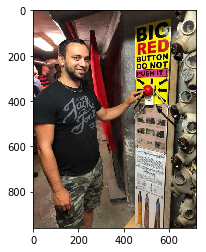

There is a human detected on the photo!
 If you born as a dog, you might look like a Pharaoh hound


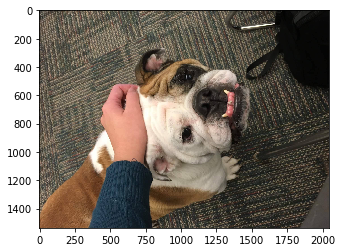

Dog has been detected in the photo!
 It seems to be a Bulldog


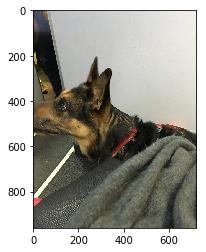

Dog has been detected in the photo!
 It seems to be a Belgian malinois


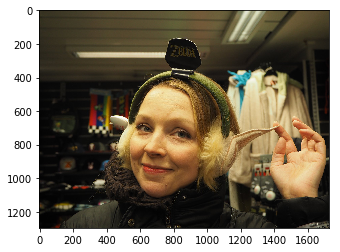

There is a human detected on the photo!
 If you born as a dog, you might look like a Chinese crested


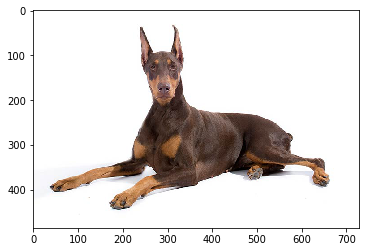

There is a human detected on the photo!
 If you born as a dog, you might look like a Manchester terrier


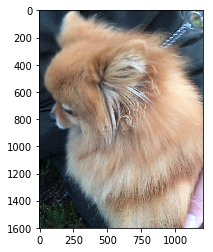

Huston, we have a problem!


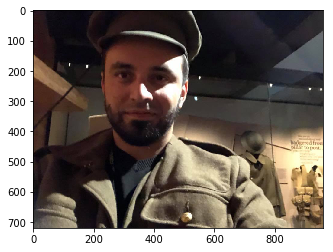

There is a human detected on the photo!
 If you born as a dog, you might look like a Pharaoh hound


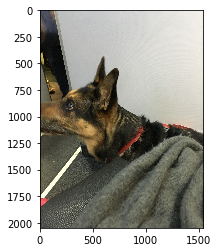

Dog has been detected in the photo!
 It seems to be a Belgian malinois


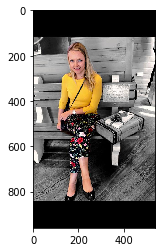

There is a human detected on the photo!
 If you born as a dog, you might look like a Chinese shar-pei


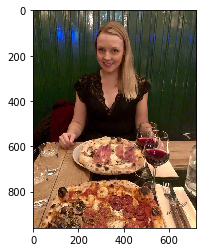

There is a human detected on the photo!
 If you born as a dog, you might look like a Chesapeake bay retriever


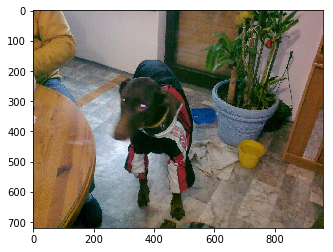

Dog has been detected in the photo!
 It seems to be a Anatolian shepherd dog


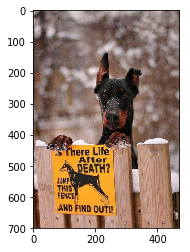

Dog has been detected in the photo!
 It seems to be a Manchester terrier


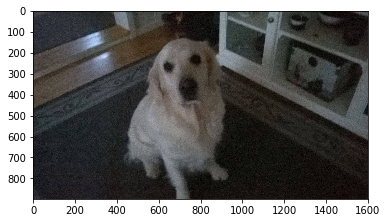

Dog has been detected in the photo!
 It seems to be a Kuvasz


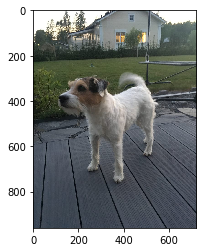

Dog has been detected in the photo!
 It seems to be a Borzoi


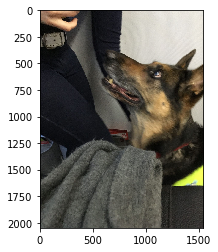

Huston, we have a problem!


In [101]:
for image in my_photos:
    run_app(image)

__Answer:__ (Three possible points for improvement)

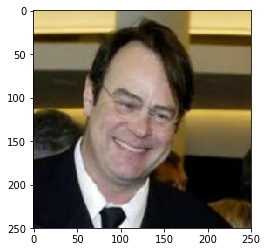

There is a human detected on the photo!
 If you born as a dog, you might look like a Irish terrier


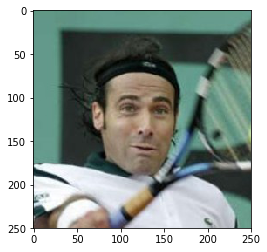

There is a human detected on the photo!
 If you born as a dog, you might look like a Chinese crested


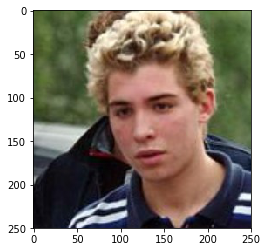

There is a human detected on the photo!
 If you born as a dog, you might look like a Norfolk terrier


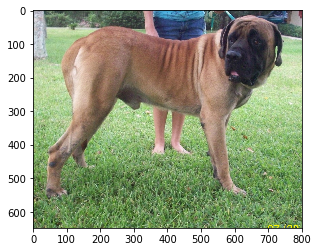

Dog has been detected in the photo!
 It seems to be a Bullmastiff


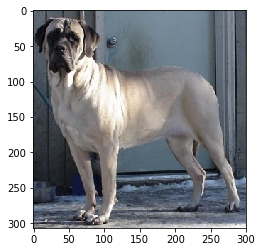

Dog has been detected in the photo!
 It seems to be a Mastiff


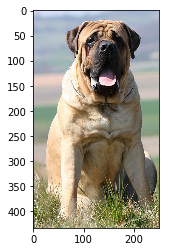

Dog has been detected in the photo!
 It seems to be a Bullmastiff


In [91]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

**ANSWER**

Is the output better than you expected :) ? Or worse :( ? 

I am happy of how human and dog detector worked together with the detector for intruders. Also, am happy how myself and my gf were interpreted as potential dog breeds:) 

When it comes to a dog breed predictor I am satisified with some of the predictions and not that satisfied with other breeds. For example it did not recognised my dog's breed, i.e. doberman pincher.

- Provide at least three possible points of improvement for your algorithm:

    There is a potential in applying batch normalisation insted of the dropout.
    
    I can increase the the number of learning epochs and also implement early stopping so I do not waste uneccessary resources if there is no improvements in dropping the loss.
    
    I could try to use different pretrained networks to see if there are improvements in validation accuracy.
    
    Also I could tweak other hyper parameters in a bit of a controlled manner (learning rate, batch size...)

